In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcdefaults()
plt.style.use(["../stylesheet.mplstyle"])
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
def get_uncertainties(df_train, df_test):
    alpha = np.percentile(np.abs(df_train["normalized residual"].to_numpy()), 68.3)
    return df_test["bootstrap standard deviation"].to_numpy() * alpha

In [4]:
def all_recalibrated_uncertainties(directory, num_trials):
    path = f"../../data-export/{directory}/"
    dfs_train = [pd.read_csv(f"{path}train-{i}.csv") for i in range(num_trials)]
    dfs_test = [pd.read_csv(f"{path}test-{i}.csv") for i in range(num_trials)]
    all_uncertainties = np.array([get_uncertainties(dfs_train[i], dfs_test[i]) for i in range(num_trials)]).flatten()
    return all_uncertainties

In [5]:
def all_normalized_residuals(directory, num_trials):
    path = f"../../data-export/{directory}/"
    dfs_test = [pd.read_csv(f"{path}test-{i}.csv") for i in range(num_trials)]
    return np.array([dfs_test[i]["normalized residual"].to_numpy() for i in range(num_trials)]).flatten()

In [6]:
noises = [1, 2, 5, 10, 20]
num_trials = 100
rel_uncertainties = [
    np.mean(all_recalibrated_uncertainties(f"Friedman-Grosse-noise-{noise}", num_trials)) / noise 
    for noise in noises
]
rel_uncertainties_stderr = [
    np.std(all_recalibrated_uncertainties(f"Friedman-Grosse-noise-{noise}", num_trials), ddof=1) / (np.sqrt(num_trials) * noise)
    for noise in noises
]
norm_residuals = [
    np.mean(np.abs(all_normalized_residuals(f"Friedman-Grosse-noise-{noise}", num_trials)))
    for noise in noises
]

In [7]:
print(norm_residuals)

[0.7232618134060221, 0.7731848278342128, 0.8649371839290901, 0.8952232561933804, 0.9088250551578082]


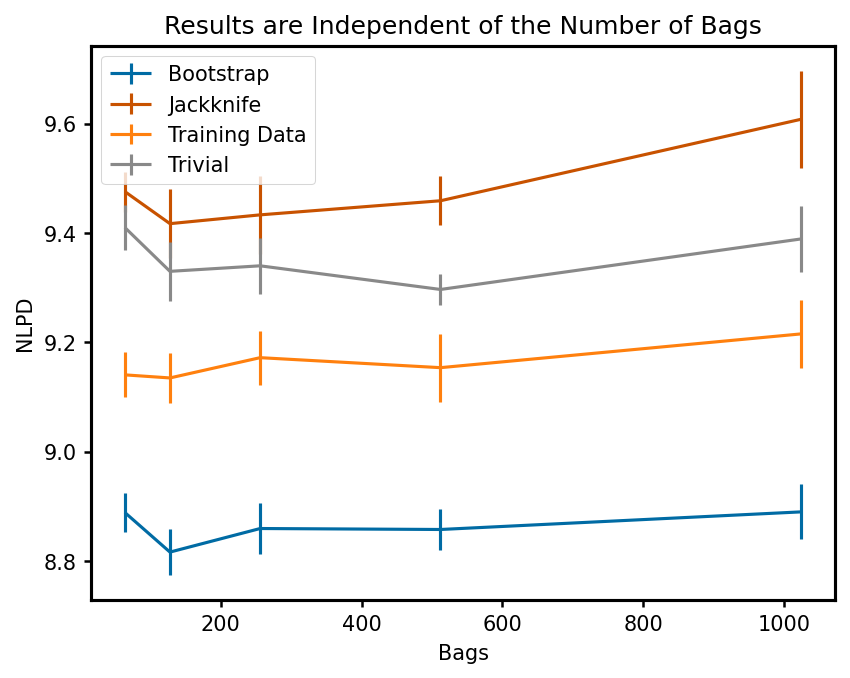

In [8]:
df = pd.read_csv(f"../../correlation-study-n-dims/Friedman-Grosse-vary-bags-nlpd.csv")
fig, ax = plt.subplots(1, 1)
for correlation_method, this_df in df.groupby("correlation method"):
        x = this_df["bags"]
        y = this_df["mean value"]
        yerr = this_df["std error of value"]
        ax.errorbar(x, y, yerr=yerr, label=correlation_method)
ax.set_ylabel("NLPD")
ax.set_xlabel("Bags")
ax.set_title("Results are Independent of the Number of Bags")
ax.legend()
plt.savefig("FG_vary_bags_correlation.svg")

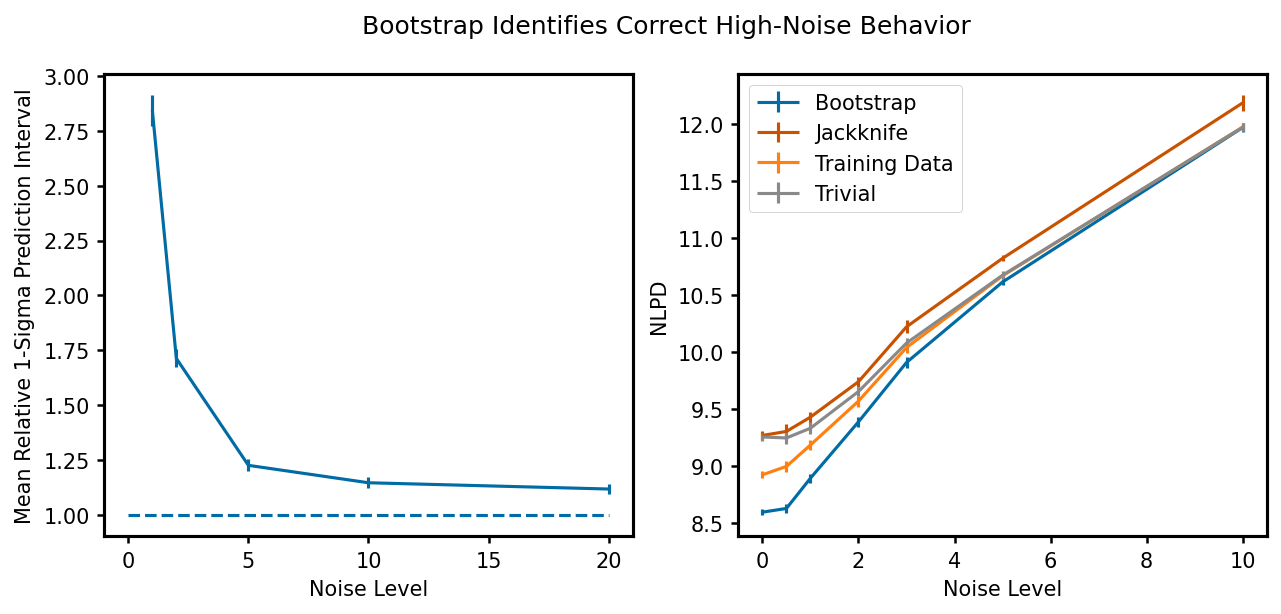

In [9]:
df = pd.read_csv(f"../../correlation-study-n-dims/Friedman-Grosse-vary-noise-nlpd.csv")
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].errorbar(noises, rel_uncertainties, yerr=rel_uncertainties_stderr)
axs[0].hlines(1.0, xmin=0, xmax=noises[-1], linestyles='--')
axs[0].set_xlabel("Noise Level")
axs[0].set_ylabel("Mean Relative 1-Sigma Prediction Interval")
for correlation_method, this_df in df.groupby("correlation method"):
        x = this_df["sample noise"]
        y = this_df["mean value"]
        yerr = this_df["std error of value"]
        axs[1].errorbar(x, y, yerr=yerr, label=correlation_method)
axs[1].set_ylabel("NLPD")
axs[1].set_xlabel("Noise Level")
plt.suptitle("Bootstrap Identifies Correct High-Noise Behavior")
axs[1].legend()
plt.savefig("FG_vary_noise.svg")